<a href="https://colab.research.google.com/github/fatymazahrae/DataCleanOptimizer/blob/main/COptimizerpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Guide  
------------  
- [Project Overview](#project-overview)  
- [Part 1: Reading Data - Exploratory Data Analysis](#I)
- [Part 2: Visual data analysis](#II)
- [Part 3: Data cleaning and preprocessing](#III)
- [Part 4: process automation](#IV)


<a id="project-overview"></a>

# Project Overview

![image.png](attachment:image.png)

##### This project aims to optimize data cleaning and preprocessing algorithms to prepare high-quality datasets for subsequent analyses. The optimization focuses not only on the efficiency of the algorithms but also on their ability to handle large volumes of data while maintaining information quality.

### about dataset :


The Adult dataset (also known as the "Census Income" dataset) is a popular dataset used in machine learning for classification tasks. It is often used to predict whether an individual's income exceeds $50,000 per year based on various demographic attributes.


#### Source: OpenMl.
#### Size: 5010000 instances (rows).
#### Attributes: 14 attributes (columns) with a mix of categorical and numerical data.
#### Target Variable: The target is a binary classification where income is either <=50K or >50K.

#### Dataset Structure:

* Age
    * Example: 39, 50, 28.
* Workclass: employment type.
    * Example: Private, Self-emp-not-inc, Local-gov.
* Fnlwgt: weighting factor, representing the number of people the individual represents.
    * Example: 77516, 83311.
* Education: the highest level of education.
    * Example: Bachelors, HS-grad, 11th.
* Education-num: the number of years of education.
  * Example: 13, 9, 7.
* Marital-status: marital status.
    * Example: Married-civ-spouse, Never-married, Divorced.
* Occupation: the type of work.
    * Example: Tech-support, Craft-repair, Other-service.
* Relationship: the individual's relationship in the household.
    * Example: Wife, Own-child, Husband.
* Race: race.
    * Example: White, Black, Asian-Pac-Islander.
* Sex: gender.
    * Example: Male, Female.
* Capital-gain: capital gains in the previous year.
    * Example: 2174, 0, 14084.
* Capital-loss: capital losses in the previous year.
    * Example: 0, 1902, 1887.
* Hours-per-week: the number of hours worked per week.
    * Example: 40, 13, 60.
* Native-country: the individual's native country.
    * Example: United-States, Mexico, Canada.
* Target Variable: Income: target varialble indicating whether the individual earns more than $50,000 per year.
    * Example: <=50K, >50K.


<a id="I"></a>

# Part 1: Reading Data - Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import warnings
import os
warnings.filterwarnings('ignore')

C:\Users\ANDDAME FATIMA\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
%%time
chunk_size = 10000
data = pd.read_csv('../data/data.csv')

CPU times: total: 16.6 s
Wall time: 54.9 s


In [ ]:
%%time
h_data = dd.read_csv('../data/data.csv')

CPU times: total: 0 ns
Wall time: 3.12 s


In [ ]:
data.dtypes

Unnamed: 0          int64
age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
class              object
dtype: object

In [ ]:
h_data.compute().describe()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,5.100000e+06,5.100000e+06,5.100000e+06,5.100000e+06,5.100000e+06,5.100000e+06,5.100000e+06
mean,2.833328e+05,3.632774e+01,1.822801e+05,1.019500e+01,3.753001e+02,2.100790e+01,4.083445e+01
std,1.635826e+05,1.164516e+01,9.429262e+04,2.035442e+00,4.374802e+03,2.046962e+02,7.885326e+00
min,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.416660e+05,2.700000e+01,1.245630e+05,9.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
50%,2.833330e+05,3.500000e+01,1.713560e+05,1.000000e+01,0.000000e+00,0.000000e+00,4.000000e+01
75%,4.249992e+05,4.500000e+01,2.200660e+05,1.200000e+01,0.000000e+00,0.000000e+00,4.000000e+01
max,5.667470e+05,9.900000e+01,2.800000e+07,1.800000e+01,9.999900e+04,9.999900e+04,9.900000e+01


In [ ]:
h_data.compute().describe(include=['object','bool'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,5100000,5100000,5100000,5100000,5100000,5100000,5100000,5100000,5100000
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,4410944,2255354,2615026,989413,2480487,4797676,3684243,5010925,3832034


In [ ]:
h_data.compute().head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,47,Private,378723,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
1,1,27,Private,243871,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
2,2,25,Private,113062,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
3,3,29,Private,87561,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
4,4,23,Private,180052,Some-college,10,Never-married,Other-service,Own-child,White,Male,0.0,0.0,35.0,United-States,<=50K


### checking duplicates


In [ ]:
duplicates = data.duplicated()
print(duplicates.sum())


20


In [ ]:
data.drop_duplicates(
)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,47,Private,378723,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
1,1,27,Private,243871,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
2,2,25,Private,113062,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
3,3,29,Private,87561,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
4,4,23,Private,180052,Some-college,10,Never-married,Other-service,Own-child,White,Male,0.0,0.0,35.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099995,566682,45,Private,273771,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
5099996,566683,33,Private,97723,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
5099997,566684,26,Private,187938,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
5099998,566685,46,Private,101812,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K


In [ ]:
duplicates = data.duplicated()
print(duplicates.sum())

20


<a id="II"></a>

# Part 2: Visual data analysis

1 Univariate visualization
  *  1.1 Quantitative features
  *  1.2 Categorical and binary features
    


### 1. Univariate visualization


#### 1.1 Quantitative features

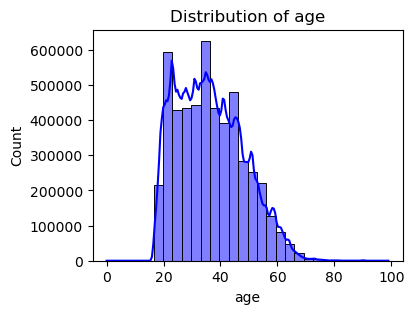

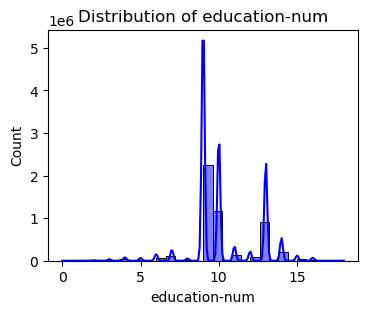

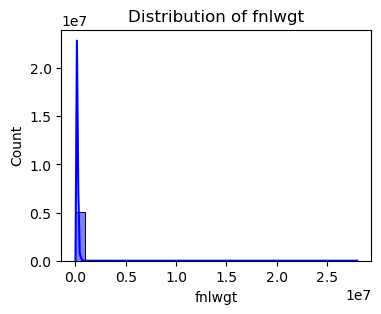

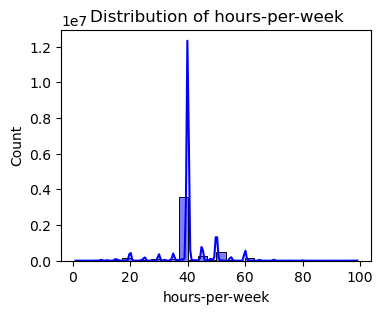

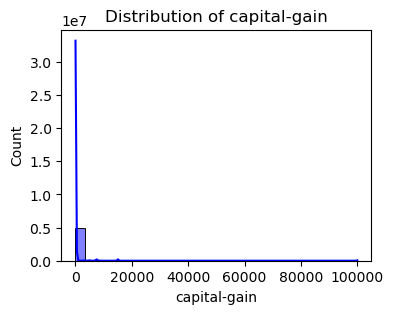

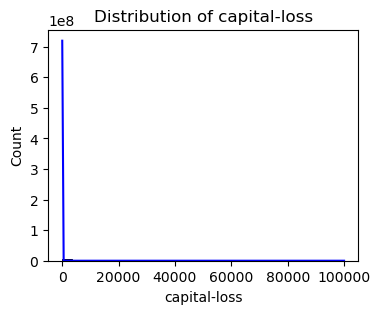

In [ ]:
features = ['age', 'education-num', 'fnlwgt', 'hours-per-week','capital-gain','capital-loss']
for feature in features:
    plt.figure(figsize=(4, 3))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()

#### 1.2 Categorical and binary features

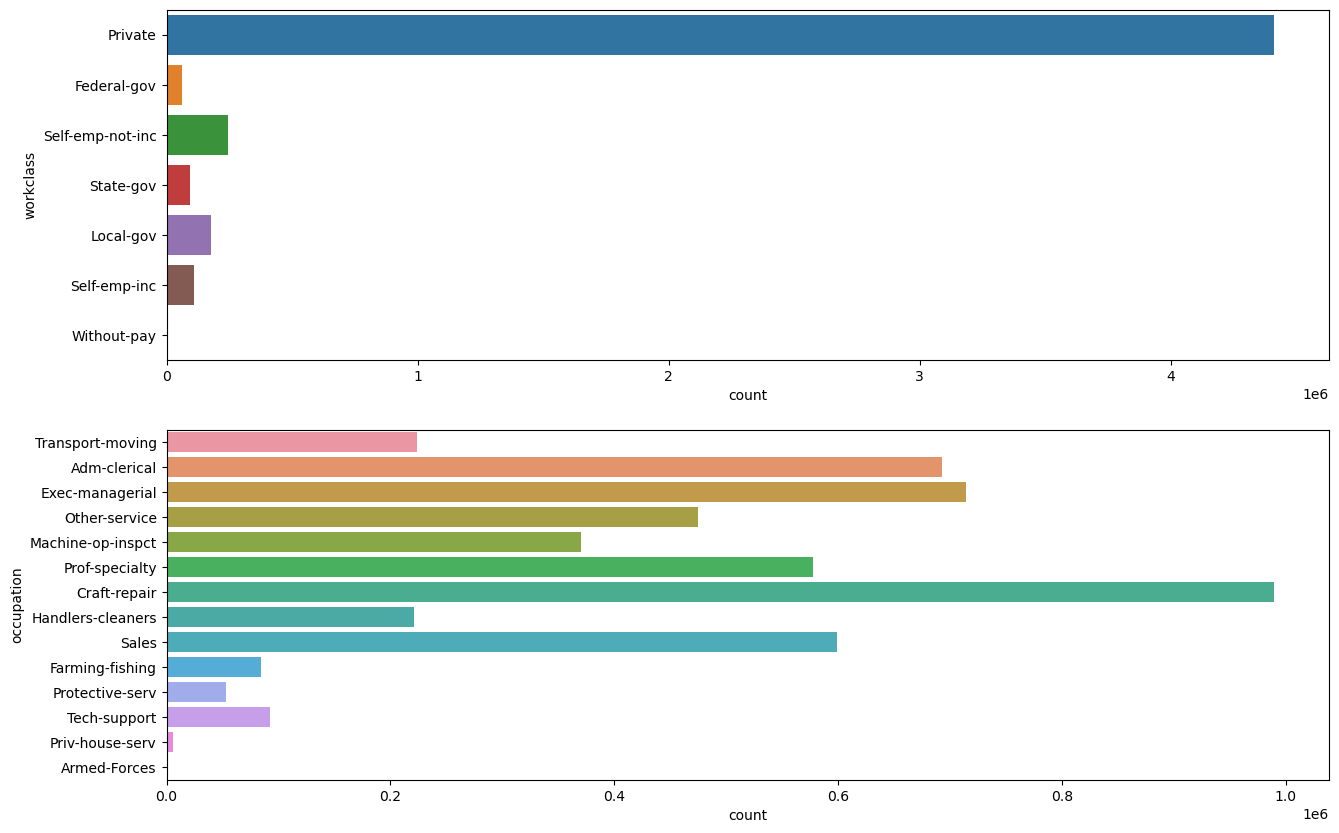

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.countplot(y='workclass', data=data, ax=axes[0]);
sns.countplot(y='occupation', data=data, ax=axes[1]);

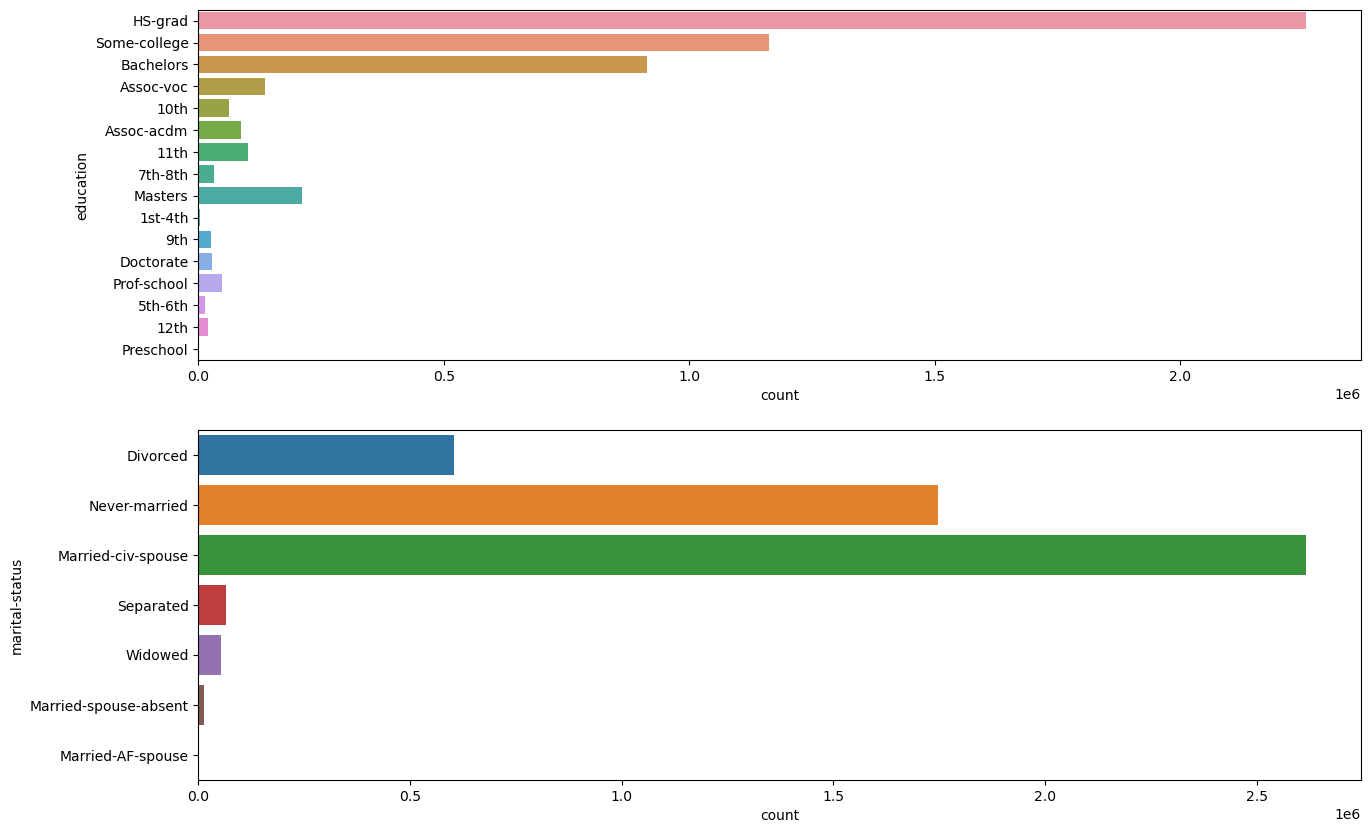

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.countplot(y='education', data=data, ax=axes[0]);
sns.countplot(y='marital-status', data=data, ax=axes[1]);

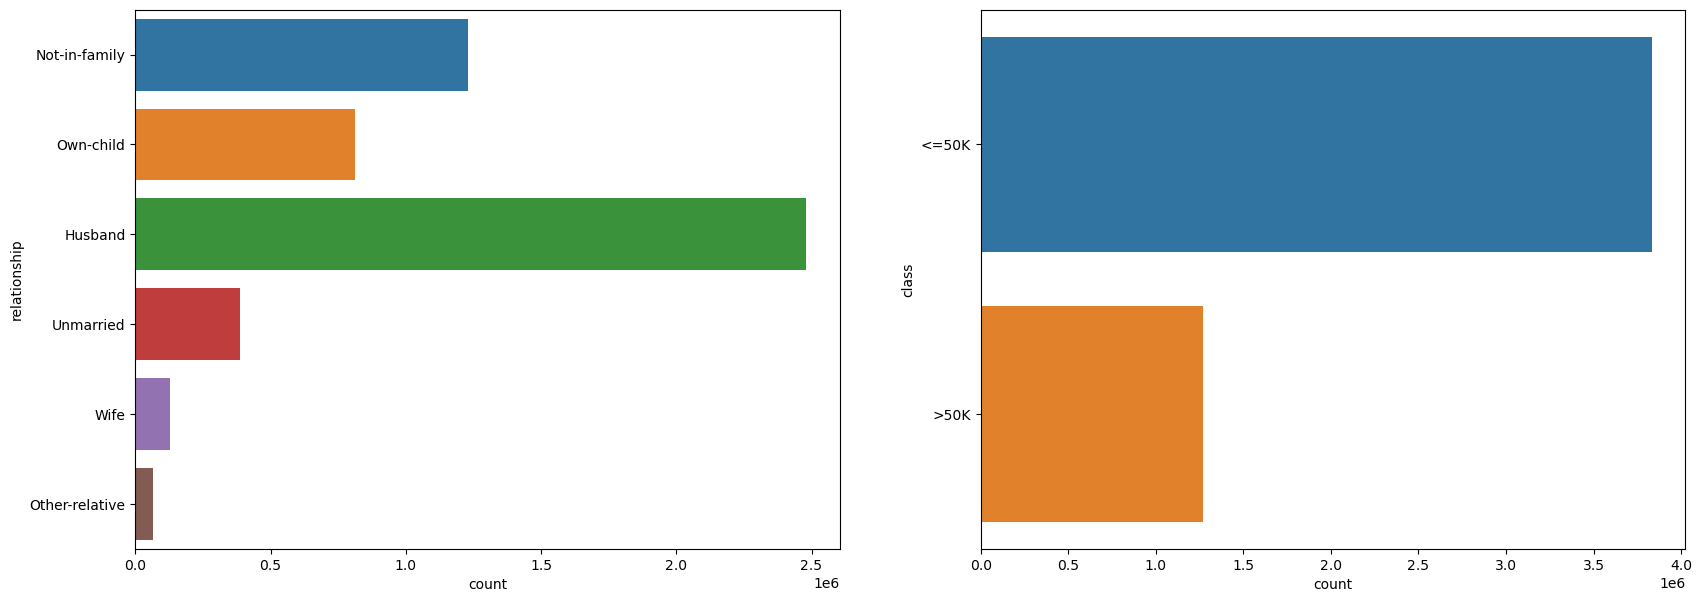

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

sns.countplot(y='relationship', data=data, ax=axes[0]);
sns.countplot(y='class', data=data, ax=axes[1]);

<a id="III"></a>

# Part 3: Data cleaning and preprocessing

### 1. duplicates handling

In [ ]:
data.columns


Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class'],
      dtype='object')

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

         Unnamed: 0  age workclass  fnlwgt     education  education-num  \
827382       260719   37   Private  186934  Some-college             10   
1434979      301629   41   Private  165815       HS-grad              9   
2331307       64577   46   Private  120131     Bachelors             13   
2793517      526787   47   Private  148995       HS-grad              9   
2971997      138657   39   Private  365739  Some-college             10   
3544776      144793   46   Private  120131     Bachelors             13   
3582356      182373   30   Private  105908       HS-grad              9   
3767169      367186   51   Private  123429     Bachelors             13   
3863461      463478   29   Private  183627       HS-grad              9   
4011796       45143   33   Private  145437       HS-grad              9   
4122745      156092   50   Private  237868       Masters             14   
4183932      217279   34   Private  174789     Assoc-voc             11   
4195084      228431   20 

In [ ]:
print(data['Unnamed: 0'].value_counts().sum())

5100000


In [ ]:
import hashlib
def drop_duplicate(data):
    hash_table = {}
    for index, row in data.iterrows():
        row_str = ''
        var = 0
        for feature in NEAR_DUPLICATES_COLUMNS:
            row_str += str(row[feature])
        hash_value = hashlib.sha256(row_str.encode('utf-8')).hexdigest()
        if hash_value in hash_table:
            var += 1
        else:
            hash_table[hash_value] = True
    print(len(hash_table))

In [ ]:
#NEAR_DUPLICATES_COLUMNS =['workclass','race','native-country', 'capital-gain', 'capital-loss']
NEAR_DUPLICATES_COLUMNS =['workclass',
       'marital-status', 'race',
'capital-gain', 'capital-loss',
       'native-country']
drop_duplicate(h_data)


NameError: name 'h_data' is not defined

### 2. missing values

In [ ]:
def detect_dtype(data):
    num_features = []
    cat_features = []

    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            num_features.append(col)
        else:
            cat_features.append(col)
    return num_features, cat_features

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

num_features, cat_features = detect_dtype(data)

for ftr in cat_features:
    data[ftr].fillna('missing', inplace=True)

data.fillna(data.mean(), inplace=True)

scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])

label_encoders = {}

for col in cat_features:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import dask.dataframe as dd

# Ensure that num_features is a list of valid column names
num_features = ['column1', 'column2', 'column3']  # Replace with your actual column names

# Check if the columns are valid
print(data.columns.tolist())

# Convert only the selected numerical features to a pandas DataFrame
data_computed = data[num_features].compute()  # Ensure num_features contains valid column names

# Initialize and fit the scaler
scaler = MinMaxScaler()
data_computed[num_features] = scaler.fit_transform(data_computed[num_features])

# If you want to convert back to Dask DataFrame
data[num_features] = dd.from_pandas(data_computed, npartitions=data.npartitions)


In [ ]:
from keras.layers import Input, Embedding, Flatten, Dense, concatenate
from keras.models import Model
from keras.optimizers import Adam

num_input = Input(shape=(1,), name='num_input')

def embeded_ftr(ftr):
    cat_input = Input(shape=(1,), name='embedded_ftr')
    cat_embed = Embedding(input_dim=len(data[ftr].unique()), output_dim=2, input_length=1)(cat_input)
    cat_flatten = Flatten()(cat_embed)
    return cat_input, cat_flatten

embeded_cats = []
cat_inputs = []

for ftr in cat_features:
    cat_input, embeded_cat = embeded_ftr(ftr)
    embeded_cats.append(embeded_cat)
    cat_inputs.append(cat_input)

combined = concatenate([num_input] + embeded_cats)

def autoencoder(input_shape):
    encoded = Dense(8, activation='relu')(input_shape)
    encoded = Dense(4, activation='relu')(encoded)

    decoded = Dense(8, activation='relu')(encoded)
    decoded = Dense(input_shape.shape[1], activation='sigmoid')(decoded)

    autoencoder = Model(inputs=[num_input] + cat_inputs, outputs=decoded)
    autoencoder.compile(optimizer=Adam(), loss='mse')

    return autoencoder

autoencoder = autoencoder(combined)

In [ ]:
autoencoder.fit([num_input] + cat_inputs, data, epochs=25, batch_size=10, shuffle=True)
reconstructed = autoencoder.predict([data[num_input],data[cat_inputs]])

### 3. anomalies detection

In [ ]:
reconstruction_error = np.mean(np.abs(data - reconstructed), axis=1)

### 4. dimentionality reduction

<a id="IV"></a>

# Part 4: Process automation